# Step 5: Adding clarification elements:

Often, we might want to add elements (such as text or markers) for clarity. Here we will demonstrate the core functions to do so. 

In [2]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
from datetime import datetime
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
from tutorial_content import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
## Set general plotting parameters
rfv.set_fontsize(10)

Font size is set to 10


### Adding panel labels (automatically)

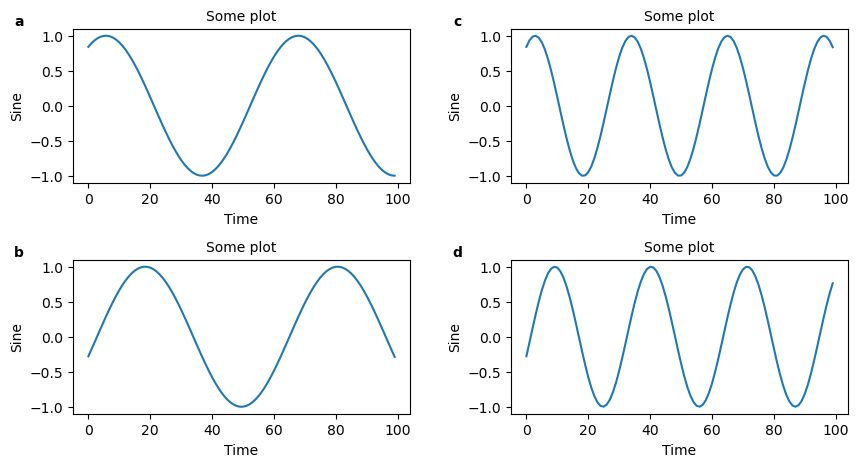

In [4]:
## Example panel automatic label placement:

fig, ax = plt.subplots(2, 2, figsize=(10, 5), 
                       gridspec_kw={'wspace': 0.3, 'hspace': 0.5})

for i_row in range(2):
    for i_col in range(2):
        curr_ax = ax[i_row, i_col]
        curr_ax.plot(np.sin((i_row * 5 + 1) + (i_col + 1) * np.linspace(0, 10, 100)))
        curr_ax.set_xlabel('Time')
        curr_ax.set_ylabel('Sine')
        curr_ax.set_title('Some plot')
        plt.draw()  # draw before adding panel labels with the function below, so that the labels are placed correctly 
        rfv.add_panel_label(ax=curr_ax, 
                            label_ind=i_row + i_col * 2, label_letter=None)



### Positioning text elements:

The basic syntax for adding text is `ax.text(s='some text', x, y, fontdict)`. A [range of other arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) can be passed to text, two of which are highlighted here (*which work for any matplotlib function!*):
- `zorder` (int) determines the order in which elements are plotted (higher number means higher order)
- `clip_on` (bool) determines if elements are confined to their axes (default is True! Also works for any matplotlib function).

Let's see these how these work:

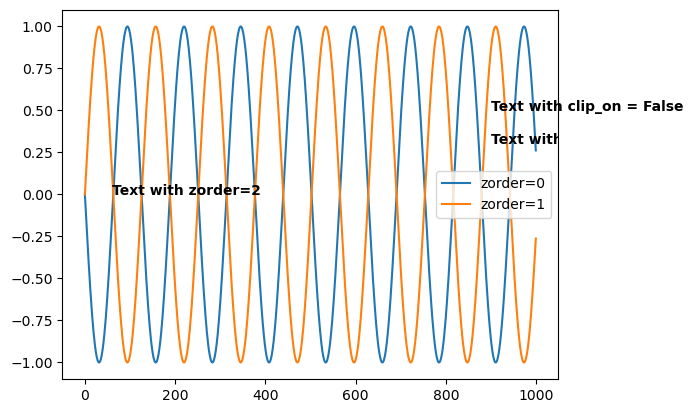

In [5]:
ax = plt.subplot(111)

ax.plot(-np.sin(np.linspace(0, 50, 1000)), zorder=0, label='zorder=0')
ax.plot(np.sin(np.linspace(0, 50, 1000)), zorder=1, label='zorder=1')
ax.text(s='Text with zorder=2', x=60, y=0.0, zorder=2, fontdict={'weight': 'bold'})

ax.text(s='Text with clip_on = False', x=900, y=0.5, zorder=2, fontdict={'weight': 'bold'}, clip_on=False)
ax.text(s='Text with clip_on = True', x=900, y=0.3, zorder=2, fontdict={'weight': 'bold'}, clip_on=True)
ax.legend()

(Note that if you want to position text elements relative to the *figure* coordinates instead of axes coordinates, you should use [`ax.annotate()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)).

When placing text, use formatted strings to your advantage! Easiest is using `f'text and {variable}'` (in Python > 3.6). Further, Latex formatting be used by `r'$\alpha$'`, which are renderred by `matplotlib` (unlike regularing `print()`):

Today is 24 May 2023
$\alpha \cdot \sum_\epsilon^N \frac{1}{\epsilon}$


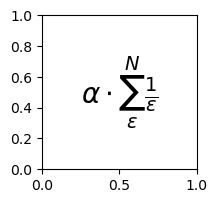

In [14]:
date_str = f'Today is {datetime.now().strftime("%d %B %Y")}'
print(date_str)

latex_str = r'$\alpha \cdot \sum_\epsilon^N \frac{1}{\epsilon}$'
print(latex_str)

fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.text(s=latex_str, x=0.5, y=0.5, fontsize=20, ha='center', va='center');

In scientific reports, significance values are often reported using scientific notation (e.g., 3 x 10^-5) or by indicating significance level (e.g., ** might indicate a p value < 0.01). We provide some functions in `rfv` that convert float values to these str notations:

In [52]:
x = 0.000234 

print(f'x is {x}')

print(f'In scientific notation, x is {x:.2e}')

print(f'In formatted text for matplotlib (rounded up), x is {rfv.readable_p(x)}')

print(f'In formatted text for matplotlib (rounded normally), x is {rfv.readable_p_exact(x)}')

print(f'By setting the significance criteria, x is {rfv.readable_p_significance_statement(x)}')  # using default args for criteria  

x is 0.000234
In scientific notation, x is 2.34e-04
In formatted text for matplotlib (rounded up), x is 3x$10^{-4}$
In formatted text for matplotlib (rounded normally), x is 2x$10^{-4}$
By setting the significance criteria, x is ('p < 0.001', '***')


## Exporting your figure

And finally we're ready to export! It is **strongly recommended** to always export as some type of vector file (e.g., PDF, SVG). Vector files don't rasterise lines, but save them as vectors. This strongly improves the quality of the figure (as the resolution remains perfect when you zoom in) at much lower file size (unless there are billions of elements) - a win-win! (If the figure contains raster images, such as JPG or PNG, these are preserved as such). 

In [17]:
plt.savefig('generated_figures/example_export.pdf',  # file name (warning: will override existing file with same name without warning)
            bbox_inches='tight',  # crop figure to contents
            pad_inches=0.1, # padding around figure
            dpi=300)  # resolution in dots per inch (dpi)

<Figure size 640x480 with 0 Axes>

## Conclusions

And that's it! Finally, check out the appendices of this tutorial for some extra tips and tricks:

[Appendix A: Importing images and vector files](https://github.com/vdplasthijs/reproducible_figures/blob/main/tutorial/Tutorial%20appendix%20A%3A%20Importing%20images%20and%20vector%20files.ipynb)

[Appendix B: Bringing everything together](https://github.com/vdplasthijs/reproducible_figures/blob/main/tutorial/Tutorial%20appendix%20B%3A%20Bringing%20everything%20together.ipynb)

[Appendix C: Tips and tricks](https://github.com/vdplasthijs/reproducible_figures/blob/main/tutorial/Tutorial%20appendix%20C%3A%20Tips%20and%20tricks.ipynb)

[Appendix D: Gallery](https://github.com/vdplasthijs/reproducible_figures/blob/main/tutorial/Tutorial%20appendix%20D%3A%20Gallery.md)